In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [7]:
train=pd.read_csv('train.csv')
train.head(11)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X_train=train.values[0:,1:]#X is columns except label
y_train=train.values[0:,0]

In [5]:
X_train.shape
y_train.shape

(42000, 784)

(42000,)

# Show dataset in pic

In [36]:
#row=10
#X_train[row].reshape((28,28))#转28*28矩阵

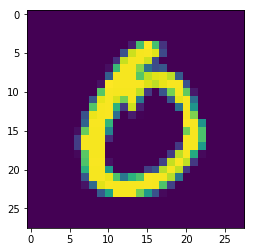

In [37]:
row=200
plt.imshow(X_train[row].reshape((28,28)));
plt.show();

In [12]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split=train_test_split(X_train, y_train, test_size=0.3,random_state=0)

In [72]:
# train-test-predict
# 20% as test
from sklearn.model_selection import train_test_split

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.3, random_state=0)#set the random parameter for selecting the 30%

In [73]:
X_train_split.shape
X_test_split.shape
y_train_split.shape
y_test_split.shape

(29400, 784)

(12600, 784)

(29400,)

(12600,)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
#k_range=range(1,8)
k=3
knn = KNeighborsClassifier(n_neighbors = k);

knn.fit(X_train_split, y_train_split);

y_pred=knn.predict(X_test_split);
y_pred

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

array([3, 6, 9, ..., 1, 6, 5], dtype=int64)

# Evaluate Algorithm Accuracy

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc=accuracy_score(y_test_split, y_pred)
acc

confusion_matrix(y_test_split, y_pred)

0.9665873015873016

array([[1231,    0,    3,    0,    0,    2,    5,    0,    1,    0],
       [   0, 1418,    3,    1,    1,    0,    4,    1,    1,    0],
       [  12,   12, 1227,    2,    0,    0,    1,   17,    3,    2],
       [   1,    1,    8, 1252,    0,   13,    2,    7,    8,    6],
       [   1,   11,    0,    0, 1184,    0,    3,    0,    0,   37],
       [   1,    0,    0,   16,    1, 1080,   15,    0,    1,    5],
       [   3,    1,    0,    0,    2,    3, 1234,    0,    0,    0],
       [   1,   12,    7,    0,    4,    0,    0, 1297,    0,   13],
       [   4,   16,    3,   30,    6,   22,    7,    2, 1101,   13],
       [   5,    2,    3,    7,   15,    3,    1,   28,    0, 1155]],
      dtype=int64)